# Logistic Regression

#### 선형회귀와 로지스틱 회귀
<div style="text_align:center;">
    <img src="https://github.com/Ha-coding-user/aivle_study/blob/main/ML/imge/Logistic1.png?raw=true">
</div>

- Linear Regression의 경우 확률이 음과 양의 방향으로 무한대로 뻗음
- Logistic Regression의 경우 확률이 0과 1 사이의 값이 됨
- 이 두 알고리즘의 간극을 Logistic Function으로 채움

#### Logistic Function
$$ p = \frac{1}{1+e^{-f(x)}} $$
- sigmoid 함수라고도 부름
- 기본적으로 확률 값 0.5를 Threshold로 하여 이보다 크면 1, 아니면 0으로 분류
<br></br>
<font color=red>
x 데이터가 주어졌을 때 확률을 예측하는 Logistic Regression은 학습 데이터를 잘 설명하는 선형 판별식의 기울기와 절편을 찾는 문제
</font>

#### 실습

- Iris 데이터로 모델링
- Logisitc Regression 모델링
- target = Species

**1. 환경 준비**

In [1]:
# Library 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%config InlineBackend.figure_format='retina'

In [2]:
# data 불러오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/iris.csv'
data = pd.read_csv(path)

**2. 데이터 이해**

In [3]:
# 상위 5개 행 확인
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# 하위 5개 행 확인
data.tail()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [5]:
# 기초통계량 확인
data.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# 변수 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


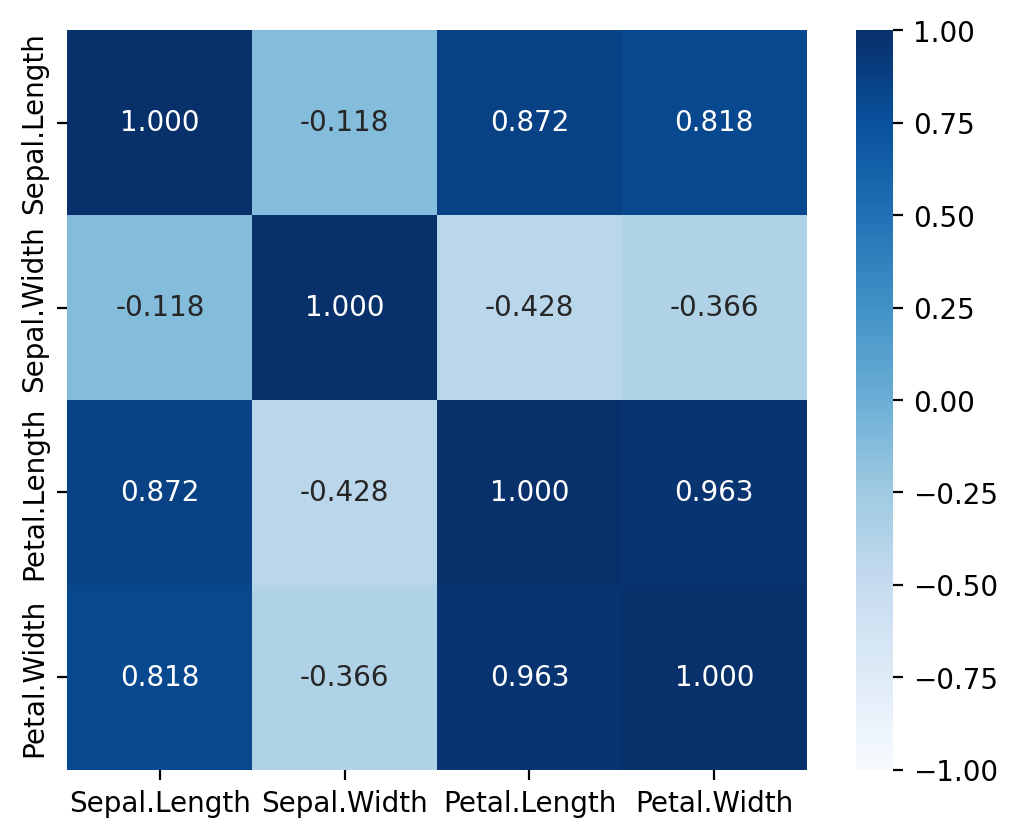

In [7]:
# 상관관계 heatmap 확인
sns.heatmap(data.corr(),
            annot=True,
            fmt='.3f',
            vmin=-1, vmax=1,
            square=True,
            cmap='Blues')
plt.show()

In [8]:
# 범주값 개수 확인
data['Species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

**3. 데이터 준비**

*1) x, y 분리*

In [9]:
# target 확인
target = 'Species'

# x, y 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]

*2) train, test 데이터 분리*

In [10]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

**4. 모델링**

In [11]:
# 1. 불러오기
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [12]:
# 2. 선언하기
model = LogisticRegression()

In [13]:
# 3. 학습하기
model.fit(x_train, y_train)

LogisticRegression()

In [14]:
# 4. 예측하기
y_pred = model.predict(x_test)

In [15]:
# 5. 평가하기
print('confusion matrix:\n', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion matrix:
 [[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      0.94      0.97        18
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [17]:
# 예측값, 실제값
print(y_pred[:10])
print(y_test.values[:10])

['setosa' 'versicolor' 'versicolor' 'setosa' 'virginica' 'versicolor'
 'virginica' 'setosa' 'setosa' 'virginica']
['setosa' 'versicolor' 'versicolor' 'setosa' 'virginica' 'versicolor'
 'virginica' 'setosa' 'setosa' 'virginica']


In [18]:
# 확률값
p = model.predict_proba(x_test)
p.round(3)[:10]

array([[0.985, 0.015, 0.   ],
       [0.274, 0.722, 0.004],
       [0.007, 0.868, 0.125],
       [0.986, 0.014, 0.   ],
       [0.   , 0.02 , 0.98 ],
       [0.005, 0.588, 0.407],
       [0.   , 0.13 , 0.87 ],
       [0.958, 0.042, 0.   ],
       [0.968, 0.032, 0.   ],
       [0.   , 0.031, 0.969]])

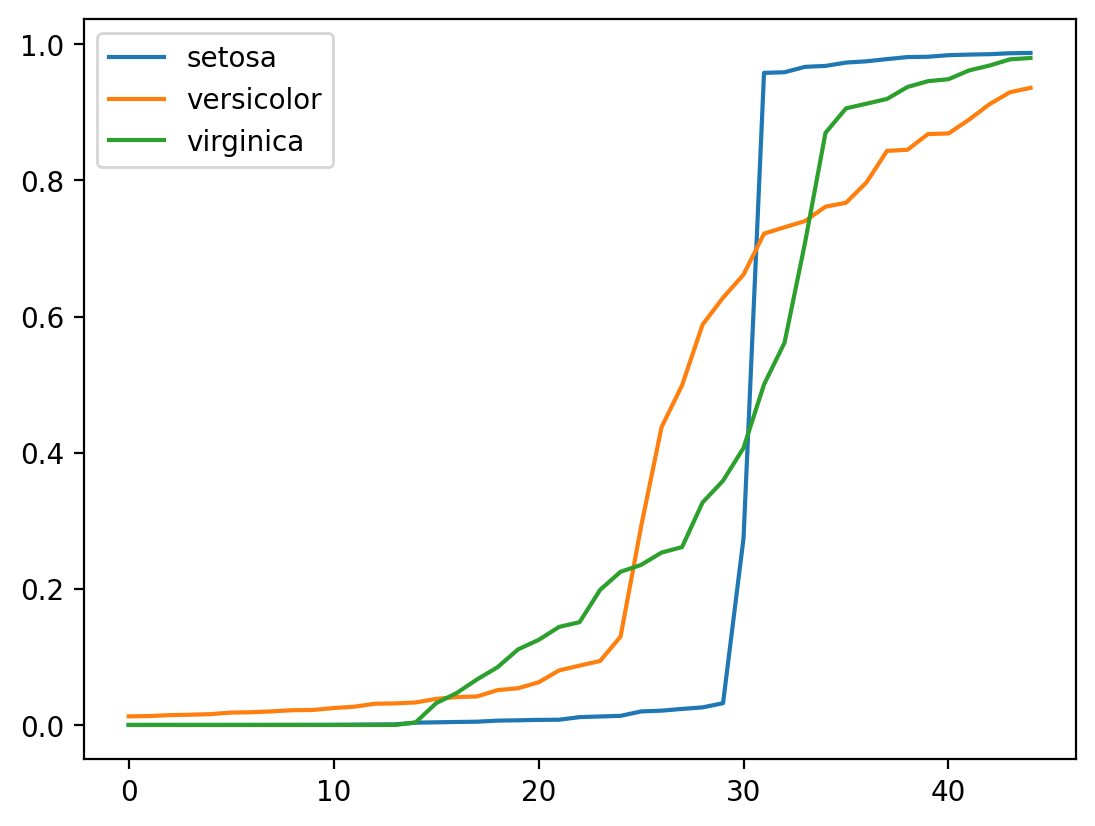

In [19]:
# 시그모이드 그래프 시각화
plt.plot(np.sort(p[:, 0]), label='setosa')
plt.plot(np.sort(p[:, 1]), label='versicolor')
plt.plot(np.sort(p[:, 2]), label='virginica')
plt.legend()
plt.show()